# Corrección ejercicio semana 15 
### Victor Daniel Mendoza Murillo 

In [190]:
## Define las librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sci
%matplotlib inline 

In [191]:
## Carga los datos del archivo de texto IRCF.txt
datos = np.loadtxt ('IRCF.txt').T

In [192]:
x = datos[0] ## Arreglo en x para la frecuencia 
y = datos[1] ## Arreglo en y para el espectro
z = datos[3] ## Arreglo para el error
e = np.linspace(0,0,(len(y))) ## Puntos necesarios para el error

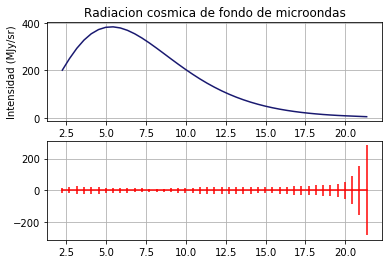

In [193]:
## Genera la gráfica de los datos dados en el archivo IRCF.txt
plt.subplot(2,1,1)
plt.plot(x,y,color='midnightblue') ## Datos de la puntos y color 
plt.title('Radiacion cosmica de fondo de microondas') ## Nombre de la gráfica
plt.xlabel('Frecuencia (1/cm)') ## Etiqueta en el eje X
plt.ylabel('Intensidad (MJy/sr)') ## Etiqueta en el eje Y
plt.grid() ## Dibuja la cuadricula en la gráfica 

## Gráfica para el error 
plt.subplot(2,1,2)
plt.errorbar(x,e,z,color='red')
plt.grid()

In [194]:
## Definir variables
h = sci.Planck ## Constante 
k = sci.Boltzmann ## Constante 
c = sci.c ## Constante
Tu = 0 ## Temperatura inicializada en 0
y = np.linspace(0,0,len(z))
Tt = np.linspace(1,5,100) ## Arreglo temperatura 
A = 0
a = 1000

In [195]:
## Crear función f1
def fI (x,Tt): ## Definir la función en razón a la frecuencia (x) y la temperatura (Tt)
    n = x*c*10**2
    I = ((h*pow(n,3)))/(pow(c,2))*(1/((np.exp((h*n)/(k*Tt)))-1))
    I=I*pow(10,-26) ## Conversión a Jansky/s
    return I

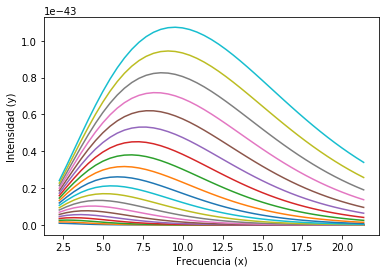

In [196]:
## Se inicia un ciclo for en función a la temperatura (Tt)
for i in range(len(Tt)):
    A = 0
    ##Se indica que la intensidad usará los valores de la frecuencia y el ciclo for de la temperatura
    B = fI(x,Tt[i])
    
    ## Se inicia un ciclo limitado por el error e
    for j in range (len(z)):
        e[j] = ((B[j]-B[j])/z[j])**2
        A = A+e[j]
       
    ## Si A es menor a a, entonces a se guardará en Tr
    if (A<a):
        a = A
        Tr = Tt[i]
    
    ## Con este if se hace una gráfica con 20 valores de la frecuencia (x) con respecto a la intensidad (y)
    if (i%5==0):
        plt.plot(x,B)
        plt.xlabel('Frecuencia (x)') ## Etiqueta eje x
        plt.ylabel('Intensidad (y)') ## Etiqueta eje y